Assignment - 3 (Networkx)     SEM 5 G 

NAME AND SRN:

1) Ranjana V PES2UG21CS422
2) Rishab A Kumar PES2UG21CS429
3) Pravarthak R PES2UG21CS395
4) Rahul G Pai PES2UG21CS414

"FAIRYLAND PLANET BY JOHN SILETTO"

NOVEL SITE:
https://www.gutenberg.org/ebooks/72131

My novel file location:
C:\Users\vranj\Documents\sem 5\GT\proj\book.txt

SOCIAL GRAPH SUMMARY:
number of characters: 8

number of edges: 13

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from networkx.algorithms.community import k_clique_communities, girvan_newman, greedy_modularity_communities

In [9]:
#QUESTION a:

#CHANGE FILE PATH OF NOVEL HERE AS REQUIRED
with open(r'C:\\Users\\vranj\\Documents\\sem 5\\GT\\proj\\book.txt', 'r', encoding='utf-8') as file:
    novel_text = file.read()

# Tokenize into sentences
sentences = sent_tokenize(novel_text)

# List of characters
characters = ["Adam", "Harry", "Ruth", "Mike-One", "Boswell", "Eaker", "Hopkins", "Pettigrew"]

# Mapping for multiple names
name_mapping = {
    "Adam-Two": "Adam",
    "Daddy": "Harry",
    "Mr.Barnaby": "Harry",
    "Mommy": "Ruth",
    "Chub": "Boswell",
    "Thin": "Eaker",
    "Hoppy": "Hopkins",
    "Petty": "Pettigrew",
}

# Replace multiple names with canonical names in the sentences
for old_name, canonical_name in name_mapping.items():
    novel_text = novel_text.replace(old_name, canonical_name)

# Tokenize into sentences again
sentences = sent_tokenize(novel_text)

# Create co-occurrence graph
co_occurrence_graph = nx.Graph()

# Populate the co-occurrence graph based on character mentions in sentences
for sentence in sentences:
    for character1 in characters:
        for character2 in characters:
            if character1 != character2 and character1 in sentence and character2 in sentence:
                co_occurrence_graph.add_edge(character1, character2)


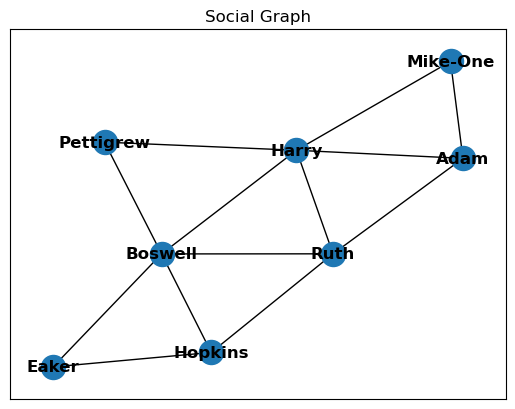

In [10]:
#QUESTION b:
# Visualization:  social network of characters in the novel based on how frequently they co-occur or interact within sentences.
pos = nx.spring_layout(co_occurrence_graph) 
nx.draw_networkx(co_occurrence_graph, pos=pos, with_labels=True, font_weight='bold')
plt.title('Social Graph')
plt.show()


In [11]:
#QUESTION c:

# Calculate centrality measures
degree_centrality = nx.degree_centrality(co_occurrence_graph)
betweenness_centrality = nx.betweenness_centrality(co_occurrence_graph)
closeness_centrality = nx.closeness_centrality(co_occurrence_graph)
pagerank_centrality = nx.pagerank(co_occurrence_graph)

# Extract centrality values for main protagonists
main_protagonists = ["Adam", "Harry", "Ruth", "Boswell", "Eaker", "Hopkins", "Pettigrew"]

degree_values = {character: degree_centrality[character]* 100 for character in main_protagonists}
betweenness_values = {character: betweenness_centrality[character]* 100 for character in main_protagonists}
closeness_values = {character: closeness_centrality[character]* 100 for character in main_protagonists}
pagerank_values = {character: pagerank_centrality[character]* 100 for character in main_protagonists}


# Print or use the results as needed
print("Degree Centrality(%):", degree_values)# mentioned frequently in the same sentences as other characters, implying a central role in the narrative.
print("Betweenness Centrality(%):", betweenness_values)# character plays a critical role in connecting different parts of the social network.
print("Closeness Centrality(%):", closeness_values)#how quickly interact with others in the network.
print("PageRank Centrality(%):", pagerank_values)# it assigns importance to a character based on both the number and quality of connections.


Degree Centrality(%): {'Adam': 42.857142857142854, 'Harry': 71.42857142857142, 'Ruth': 57.14285714285714, 'Boswell': 71.42857142857142, 'Eaker': 28.57142857142857, 'Hopkins': 42.857142857142854, 'Pettigrew': 28.57142857142857}
Betweenness Centrality(%): {'Adam': 3.9682539682539675, 'Harry': 30.952380952380953, 'Ruth': 15.87301587301587, 'Boswell': 30.952380952380953, 'Eaker': 0.0, 'Hopkins': 3.9682539682539675, 'Pettigrew': 0.0}
Closeness Centrality(%): {'Adam': 58.333333333333336, 'Harry': 77.77777777777779, 'Ruth': 70.0, 'Boswell': 77.77777777777779, 'Eaker': 50.0, 'Hopkins': 58.333333333333336, 'Pettigrew': 58.333333333333336}
PageRank Centrality(%): {'Adam': 11.70290536336562, 'Harry': 18.48698855165375, 'Ruth': 14.79230338793407, 'Boswell': 18.48698855165375, 'Eaker': 8.333651693967035, 'Hopkins': 11.70290536336562, 'Pettigrew': 8.160605394093118}


In [12]:
#QUESTION d:

# Extract ego network and calculate local clustering coefficient
ego_networks = {}
local_clustering_coefficients = {}

for protagonist in main_protagonists:
    ego_network = nx.ego_graph(co_occurrence_graph, protagonist)
    ego_networks[protagonist] = ego_network
    local_clustering_coefficient = nx.average_clustering(ego_network)
    local_clustering_coefficients[protagonist] = local_clustering_coefficient

#Measures the extent to which a character's connections are connected to each other.
print("Local Clustering Coefficients:", local_clustering_coefficients)

Local Clustering Coefficients: {'Adam': 0.8333333333333333, 'Harry': 0.7333333333333333, 'Ruth': 0.7666666666666666, 'Boswell': 0.7333333333333334, 'Eaker': 1.0, 'Hopkins': 0.8333333333333333, 'Pettigrew': 1.0}


In [13]:
#QUESTION e:

# Detect communities
clique_percolation_communities = list(k_clique_communities(co_occurrence_graph, 3))
girvan_newman_communities = list(girvan_newman(co_occurrence_graph))
louvain_communities = list(greedy_modularity_communities(co_occurrence_graph))

# Print or use the results as needed
print("Clique Percolation Communities:", clique_percolation_communities)
print("Girvan Newman Communities:", girvan_newman_communities)
print("Louvain Communities:", louvain_communities)

Clique Percolation Communities: [frozenset({'Pettigrew', 'Boswell', 'Ruth', 'Eaker', 'Mike-One', 'Hopkins', 'Adam', 'Harry'})]
Girvan Newman Communities: [({'Adam', 'Harry', 'Pettigrew', 'Mike-One'}, {'Eaker', 'Boswell', 'Ruth', 'Hopkins'}), ({'Adam', 'Harry', 'Mike-One'}, {'Eaker', 'Boswell', 'Ruth', 'Hopkins'}, {'Pettigrew'}), ({'Adam', 'Harry', 'Mike-One'}, {'Ruth'}, {'Boswell', 'Eaker', 'Hopkins'}, {'Pettigrew'}), ({'Harry'}, {'Ruth'}, {'Adam', 'Mike-One'}, {'Boswell', 'Eaker', 'Hopkins'}, {'Pettigrew'}), ({'Harry'}, {'Ruth'}, {'Mike-One'}, {'Adam'}, {'Boswell', 'Eaker', 'Hopkins'}, {'Pettigrew'}), ({'Harry'}, {'Ruth'}, {'Mike-One'}, {'Adam'}, {'Boswell'}, {'Hopkins', 'Eaker'}, {'Pettigrew'}), ({'Harry'}, {'Ruth'}, {'Mike-One'}, {'Adam'}, {'Boswell'}, {'Eaker'}, {'Hopkins'}, {'Pettigrew'})]
Louvain Communities: [frozenset({'Ruth', 'Boswell', 'Eaker', 'Hopkins'}), frozenset({'Adam', 'Harry', 'Pettigrew', 'Mike-One'})]


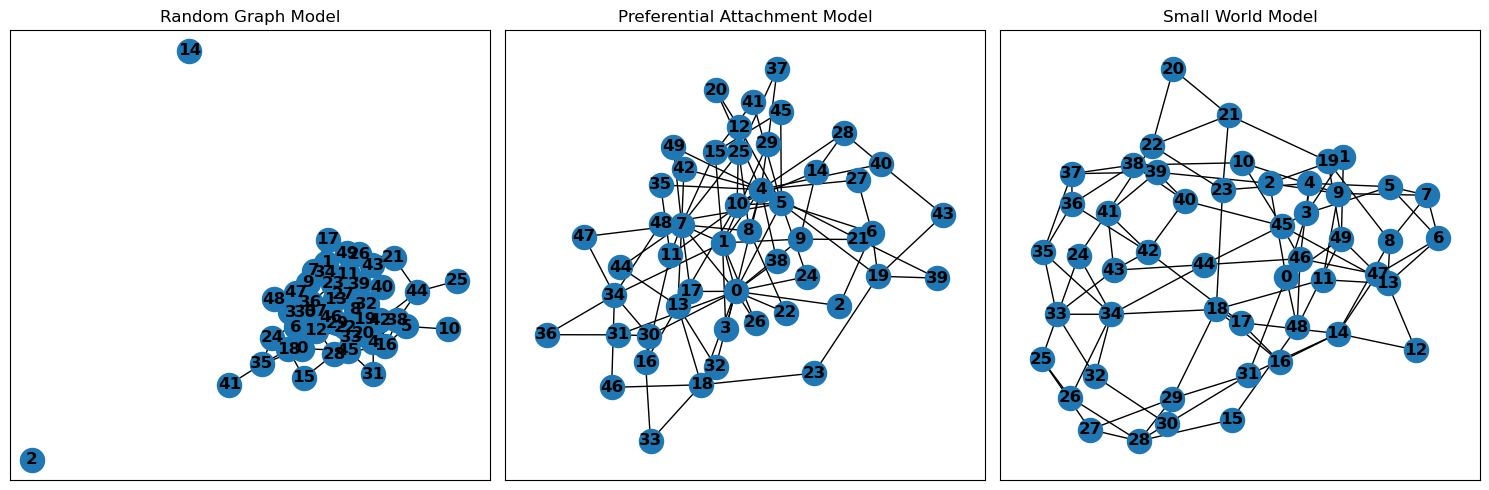

In [14]:
#QUESTION f:

# Generate generative models for 50 nodes
random_graph_model = nx.gnp_random_graph(50, 0.1)
preferential_attachment_model = nx.barabasi_albert_graph(50, 2)
small_world_model = nx.watts_strogatz_graph(50, 4, 0.3)

# Visualization of generative models
pos_random = nx.spring_layout(random_graph_model)
pos_pa = nx.spring_layout(preferential_attachment_model)
pos_sw = nx.spring_layout(small_world_model)

plt.figure(figsize=(15, 5))

plt.subplot(131)
nx.draw_networkx(random_graph_model, pos=pos_random, with_labels=True, font_weight='bold')
plt.title('Random Graph Model')

plt.subplot(132)
nx.draw_networkx(preferential_attachment_model, pos=pos_pa, with_labels=True, font_weight='bold')
plt.title('Preferential Attachment Model')

plt.subplot(133)
nx.draw_networkx(small_world_model, pos=pos_sw, with_labels=True, font_weight='bold')
plt.title('Small World Model')

plt.tight_layout()
plt.show()

ANALYSIS:

The story is from first person perspective of Harry and has other notible characters like Adam and Ruth with whom he has frequent contact.
As per the network analysis, we are getting similar outcomes:

a. With the four centralities and social graph extracted, we have concluded that the protagonists of the novel are : Harry, Adam, Ruth with Boswell and Pettigrew having significant impact to the overall plot.

    1- DEGREE CENTRALITY:Indicates the number of connections a character has.Harry and Boswell have high degree centrality which suggests that a character is mentioned frequently in the same sentences as other characters, implying a central role in the narrative.

    2- Betweenness Centrality:
    Measures the extent to which a character lies on the shortest paths between other characters.
    High betweenness centrality of Harry and Boswell suggests that the character plays a critical role in connecting different parts of the social network.

    3-Closeness Centrality:
    Measures how close a character is to all other characters in the network. Harry, Ruth and Boswell have high(%)
    High closeness centrality indicates that a character can quickly interact with others in the network.

    4-PageRank Centrality:
    importance to a character based on both the number and quality of connections.Harry, Boswell and Ruth
    Characters with high PageRank centrality are considered important by having connections with other important characters.

b.The social graph extracted from a novel is inherently fictional. The characters and their interactions are a product of the author's imagination and creativity. While it may exhibit properties such as a small-world phenomenon or community structure similar to real-world networks, its nature is constrained to the narrative context of the story. The centrality measures and local clustering coefficient provide insights into the prominence and connectivity of characters within the fictional realm, but it's important not to read too much into these results for real-world social networks since the relationships are shaped by the narrative rather than real-life interactions.

c.Yes, our analysis highlights on the importance of Harry and Broswell but fails to highlight the significance of Adam and Pettigrew. 

Adam is the central topic of the story, but is never in direct contact with any of the other central characters other than with Harry and so is lost in the analysis calculation.

Pettigrew comes in very late into the story but his role has a large significance in the way the plot moves and his importance is also misinterpreted in the centrality measurements as he is only mentioned a few times towards the latter half of the novel.

Though Ruth has connections with all the important characters with third highest page rank, in reality in the story plot, she plays the role of bystander and does not affect the plot in any way directly

Our analysis of "Fairyland Planet by John Siletto" gives us a basic idea of the protagonists among many characters but fails to pinpoint that the central story involves around Harry and Adam alone.